# Introducción

Antes de poder utilizar los datos, a menudo es necesario realizar una limpieza y transformación de los datos. Este proceso implica identificar y corregir errores o incoherencias en los datos, así como reestructurar o reformatear los datos para que puedan utilizarse de forma más eficaz.

## Limpieza

La limpieza de datos suele implicar varios pasos, entre los que se incluyen:



* Perfilado de datos (Data profiling): Consiste en analizar los datos para identificar incoherencias o anomalías que deban corregirse.
* Normalización de datos(Data Standarization): Consiste en convertir los datos a un formato estandarizado para que puedan compararse y analizarse más fácilmente.
* Enriquecimiento de datos(Data enrichment): Consiste en añadir datos adicionales a los conjuntos de datos existentes, como información demográfica o datos geográficos.
* Validación de datos (Data Validation): Se trata de comprobar que los datos son exactos y completos.

## Transformación

Una vez depurados los datos, puede ser necesario transformarlos en un formato adecuado para el análisis. Esto puede implicar

* Agregación de datos (Data aggregation): Se trata de combinar varios conjuntos de datos en uno solo para su análisis.

* Normalización de datos (Data Normalization): Se trata de ajustar los datos para que se ajusten a un conjunto específico de normas o criterios.

* Reducción de datos: Consiste en reducir la cantidad de datos que hay que analizar eliminando los datos innecesarios o redundantes.

* Integración de datos: Consiste en combinar datos de múltiples fuentes en un único conjunto de datos para su análisis.

En este ejercicio vamos a ver de manera práctica cómo aplicar estas técnicas usando la librería Pandas



# La librería Pandas
Pandas es una librería de Python especializada en el manejo y análisis de estructuras de datos.

# 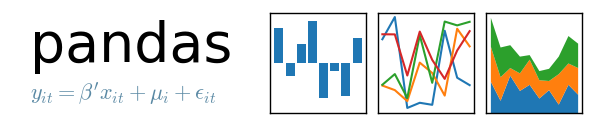

# Las principales características de esta librería son:

* Define nuevas estructuras de datos basadas en los arrays de la librería NumPy pero con nuevas funcionalidades.
* Permite leer y escribir fácilmente ficheros en formato CSV, Excel y bases de datos SQL.
* Permite acceder a los datos mediante índices o nombres para filas y columnas.
* Ofrece métodos para reordenar, dividir y combinar conjuntos de datos.
* Permite trabajar con series temporales.
* Realiza todas estas operaciones de manera muy eficiente.

## Tipos de datos de Pandas
Pandas dispone de tres estructuras de datos diferentes:

*   Series: Estructura de una dimensión.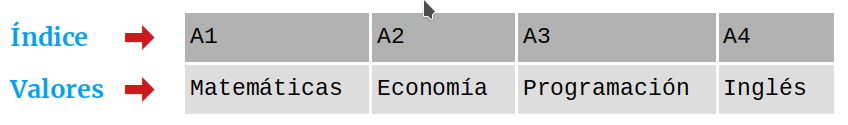
*   DataFrame: Estructura de dos dimensiones (tablas).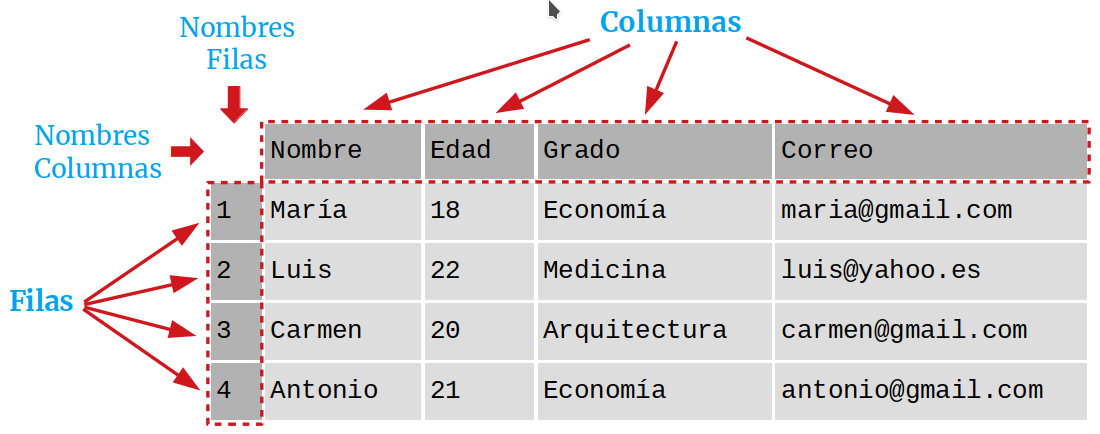
*   Panel: Estructura de tres dimensiones (cubos). No los vamos a utilizar.

Estas estructuras se construyen a partir de arrays de la librería NumPy, añadiendo nuevas funcionalidades.

Ahora voy a continuar explicando cómo usar Pandas con un ejemplo práctico, pero si necesitas un poco más de teoría sobre cómo usar estos tipos de datos:
[PUEDES SEGUIR LEYENDO AQUÍ](https://aprendeconalf.es/docencia/python/manual/pandas/)

# Data profiling

En este ejemplo, utilizamos el popular conjunto de datos Iris, que contiene mediciones de la longitud y anchura de los sépalos y pétalos de tres tipos diferentes de flores de iris, en este caso en formato csv. [Es un conjunto de datos muy icónico](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris) que se suele usar para ejemplos sencillos, como es el caso.


 Para comenzar estamos utilizando técnicas básicas de perfilado, pero también estamos utilizando algunas visualizaciones adicionales para obtener información sobre los datos:



*   boxplot() crea un gráfico de caja para cada columna numérica, lo que nos permite identificar cualquier valor atípico o extremo en los datos.
*   heatmap() crea una matriz de correlación y un mapa de calor para las columnas numéricas, lo que nos permite ver cómo se relacionan las variables entre sí.
*   hist() crea un histograma de la variable longitud del sépalo, permitiéndonos ver la distribución de los valores de esa variable.


Estas visualizaciones adicionales pueden proporcionar una comprensión más detallada de los datos y ayudarnos a identificar cualquier patrón o relación que pueda no ser inmediatamente evidente a partir de los estadísticos de resumen básicos.

Primeras filas del dataframe:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Estadísticas resumidas para las columnas numéricas:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.

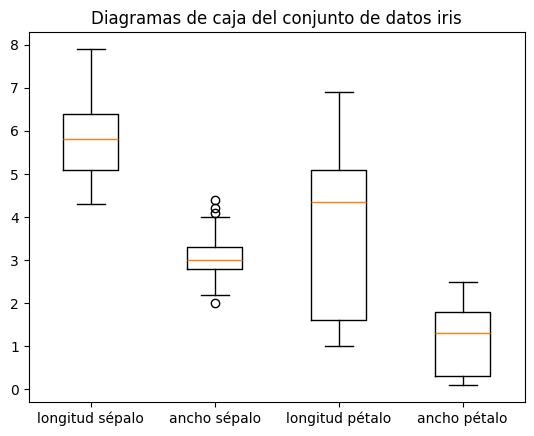

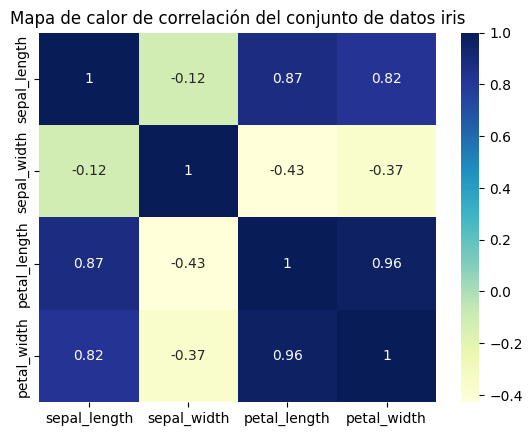

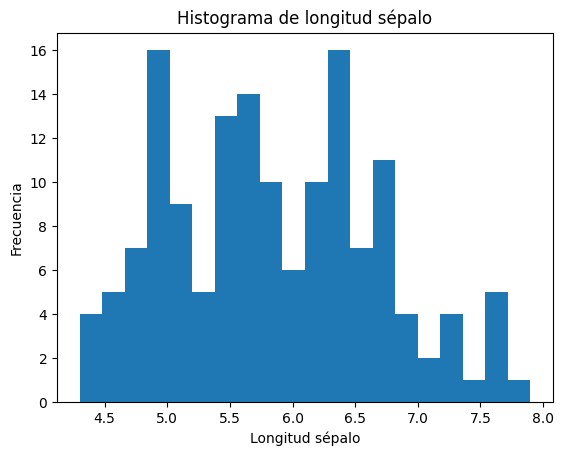

In [ ]:
import pandas as pd

# Cargar los datos en un dataframe de pandas desde una URL
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

# Mostrar las primeras filas del dataframe
print("Primeras filas del dataframe:")
print(df.head())

# Generar estadísticas básicas para las columnas numéricas
print("\nEstadísticas resumidas para las columnas numéricas:")
print(df.describe())

# Obtener los tipos de datos de cada columna
print("\nTipos de datos de cada columna:")
print(df.dtypes)

# Obtener el número de valores únicos para cada columna
print("\nNúmero de valores únicos para cada columna:")
print(df.nunique())

# Obtener el número de valores faltantes en cada columna
print("\nNúmero de valores faltantes en cada columna:")
print(df.isnull().sum())

# Identificar valores atípicos en los datos usando diagramas de caja
import matplotlib.pyplot as plt
plt.boxplot([df['sepal_length'], df['sepal_width'], df['petal_length'], df['petal_width']])
plt.xticks([1, 2, 3, 4], ['longitud sépalo', 'ancho sépalo', 'longitud pétalo', 'ancho pétalo'])
plt.title("Diagramas de caja del conjunto de datos iris")
plt.show()

# Identificar correlaciones entre variables usando un mapa de calor
import seaborn as sns


# Selecciono solo las numéricas para poder hacer el mapa de calor
numerical_df = df.select_dtypes(include=['number'])

sns.heatmap(numerical_df.corr(), annot=True, cmap="YlGnBu")
plt.title("Mapa de calor de correlación del conjunto de datos iris")
plt.show()

# Generar un histograma de la variable longitud sépalo
plt.hist(df['sepal_length'], bins=20)
plt.xlabel("Longitud sépalo")
plt.ylabel("Frecuencia")
plt.title("Histograma de longitud sépalo")
plt.show()

# Data Standarization

En este ejemplo, estamos utilizando la clase StandardScaler del módulo sklearn.preprocessing para estandarizar las columnas numéricas en el conjunto de datos del iris. Esto es lo que hace el código:


*   Empezamos cargando el conjunto de datos del iris en un marco de datos Pandas.
*   Seleccionamos las columnas numéricas que queremos estandarizar.
*   Creamos un objeto StandardScaler y lo ajustamos a los datos.
*   Aplicamos el escalador a los datos y creamos un nuevo marco de datos con los valores estandarizados.
*   Mostramos las primeras filas del marco de datos escalado para confirmar que la estandarización ha funcionado.
*   Por último, comparamos la media y la desviación estándar de los datos originales y escalados para ver cómo han cambiado.


La estandarización es un paso de preprocesamiento común para muchos algoritmos de aprendizaje automático, ya que ayuda a garantizar que todas las características tienen escalas y rangos similares. Esto puede mejorar el rendimiento de algunos algoritmos y hacerlos menos sensibles a la magnitud absoluta de las características.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar los datos en un DataFrame de pandas
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

# Seleccionar las columnas numéricas para estandarizar
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Crear un objeto StandardScaler y ajustarlo a los datos
scaler = StandardScaler()
scaler.fit(df[num_cols])

# Aplicar el escalador a los datos y crear un nuevo DataFrame
scaled_data = scaler.transform(df[num_cols])
scaled_df = pd.DataFrame(scaled_data, columns=num_cols)

# Mostrar las primeras filas del DataFrame escalado
print("Primeras filas del DataFrame escalado:")
print(scaled_df.head())

# Comparar la media y la desviación estándar de los datos originales y escalados
print("\nMedia y desviación estándar de los datos originales:")
print(df[num_cols].mean())
print(df[num_cols].std())

print("\nMedia y desviación estándar de los datos escalados:")
print(scaled_df.mean())
print(scaled_df.std())

Primeras filas del DataFrame escalado:
   sepal_length  sepal_width  petal_length  petal_width
0     -0.900681     1.019004     -1.340227    -1.315444
1     -1.143017    -0.131979     -1.340227    -1.315444
2     -1.385353     0.328414     -1.397064    -1.315444
3     -1.506521     0.098217     -1.283389    -1.315444
4     -1.021849     1.249201     -1.340227    -1.315444

Media y desviación estándar de los datos originales:
sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64
sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

Media y desviación estándar de los datos escalados:
sepal_length   -4.736952e-16
sepal_width    -7.815970e-16
petal_length   -4.263256e-16
petal_width    -4.736952e-16
dtype: float64
sepal_length    1.00335
sepal_width     1.00335
petal_length    1.00335
petal_width     1.00335
dtype: float64


# Data enrichment

En este ejemplo, utilizamos la API de Wikipedia para enriquecer el conjunto de datos del iris con información adicional sobre cada especie. Esto es lo que hace el código:



*   Empezamos cargando el conjunto de datos del iris en un marco de datos Pandas.
*   Definimos una función llamada enrich_data que toma una fila de datos como entrada y devuelve la misma fila con información adicional añadida.
*   La función enrich_data extrae el nombre de la especie de la fila y lo utiliza para consultar la API de Wikipedia en busca de información adicional sobre la especie.
*   La función extrae el texto del resumen de la respuesta de la API y lo añade a la fila como una nueva columna llamada "resumen".
*   Aplicamos la función enrich_data a cada fila del marco de datos mediante el método apply.
*   Por último, mostramos las primeras filas del marco de datos enriquecido y lo guardamos en un archivo CSV para su posterior análisis.


El enriquecimiento de datos es una poderosa técnica para aumentar el valor de los datos existentes añadiendo nueva información procedente de fuentes externas. Esto puede ayudar a descubrir patrones ocultos y perspectivas que pueden no ser evidentes a partir de los datos originales por sí solos.

In [ ]:
import pandas as pd
import requests
from json.decoder import JSONDecodeError

# Cargar los datos en un DataFrame de pandas
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

# Definir una función para enriquecer los datos con información adicional
def enriquecer_datos(fila):
    # Extraer el nombre de la especie de la fila
    especie = fila['species']

    # Utilizar la API de Wikipedia para obtener información adicional sobre la especie
    url = f"https://en.wikipedia.org/api/rest_v1/page/summary/{especie}"
    # Add a User-Agent header to the request
    headers = {'User-agent': 'Mozilla/5.0' }
    respuesta = requests.get(url, headers=headers)

    # Verificar si la solicitud fue exitosa antes de intentar parsear JSON
    if respuesta.ok:
        try:
            # This line attempts to convert the response text (a string) to a JSON object
            datos = respuesta.json()
            # Extraer el texto del resumen de la respuesta de la API
            resumen = datos.get('extract', '')
        except JSONDecodeError:
            print(f"Advertencia: Falló el parseo JSON para la especie '{especie}'. Estado: {respuesta.status_code}, Respuesta: {respuesta.text[:200]}...") # Print partial response
            resumen = ''
    else:
        # Si la solicitud falló, asignar un valor predeterminado o vacío
        print(f"Advertencia: No se pudo obtener la información para la especie '{especie}'. Estado: {respuesta.status_code}")
        resumen = '' # Asigna una cadena vacía o un valor por defecto

    # Agregar el texto del resumen a la fila
    fila['resumen'] = resumen

    return fila

# Aplicar la función enriquecer_datos a cada fila en el DataFrame
datos_enriquecidos = df.apply(enriquecer_datos, axis=1)

# Mostrar las primeras filas del DataFrame enriquecido
print("Primeras filas del DataFrame enriquecido:")
print(datos_enriquecidos.head())

# Guardar los datos enriquecidos en un archivo CSV
datos_enriquecidos.to_csv("datos_iris_enriquecidos.csv", index=False)

Advertencia: No se pudo obtener la información para la especie 'virginica'. Estado: 404
Advertencia: No se pudo obtener la información para la especie 'virginica'. Estado: 404
Advertencia: No se pudo obtener la información para la especie 'virginica'. Estado: 404
Advertencia: No se pudo obtener la información para la especie 'virginica'. Estado: 404
Advertencia: No se pudo obtener la información para la especie 'virginica'. Estado: 404
Advertencia: No se pudo obtener la información para la especie 'virginica'. Estado: 404
Advertencia: No se pudo obtener la información para la especie 'virginica'. Estado: 404
Advertencia: No se pudo obtener la información para la especie 'virginica'. Estado: 404
Advertencia: No se pudo obtener la información para la especie 'virginica'. Estado: 404
Advertencia: No se pudo obtener la información para la especie 'virginica'. Estado: 404
Advertencia: No se pudo obtener la información para la especie 'virginica'. Estado: 404
Advertencia: No se pudo obtener 

# Data Validation

En este ejemplo, tenemos un DataFrame df con las columnas 'Nombre', 'Edad', 'Sexo' y 'Email'. Observe que hay algunos valores no válidos en las columnas "Edad" y "Correo electrónico".

Para realizar la validación de datos, podemos definir reglas de validación para cada columna. He aquí un ejemplo:

In [ ]:
import pandas as pd

data = {'Name': ['John', 'Mary', 'Bob', 'Alice'],
        'Age': [25, 30, -10, 40],
        'Gender': ['M', 'F', 'M', 'F'],
        'Email': ['john@gmail.com', 'mary@yahoo.com', 'bobhotmail.com', 'alice@gmail.com']}

df = pd.DataFrame(data)



En este ejemplo, definimos las reglas de validación como funciones lambda para cada columna. A continuación, recorremos cada columna y aplicamos la regla de validación correspondiente utilizando el método apply() del DataFrame. Utilizamos el operador ~ para negar el resultado de la regla de validación, de forma que obtenemos el índice de las filas con valores no válidos. Por último, establecemos los valores no válidos en None.

Después de ejecutar este código, el DataFrame df tendrá los valores no válidos en las columnas 'Age' y 'Email' establecidos en None. Podemos entonces proceder a manejar estos valores perdidos como sea apropiado para nuestro caso de uso.

In [ ]:
# Define validation rules
rules = {
    'Age': lambda x: x > 0,  # Age should be a positive number
    'Gender': lambda x: x in ['M', 'F'],  # Gender should be either 'M' or 'F'
    'Email': lambda x: '@' in x  # Email should contain '@'
}

# Validate data
for col, rule in rules.items():
    invalid_rows = df[~df[col].apply(rule)].index
    if len(invalid_rows) > 0:
        df.loc[invalid_rows, col] = None  # Set invalid values to None
display(df)

,Name,Age,Gender,Email
0,John,25.0,M,john@gmail.com
1,Mary,30.0,F,mary@yahoo.com
2,Bob,NaN,M,None
3,Alice,40.0,F,alice@gmail.com


# Data aggregation

Esto crea un DataFrame con información sobre la población y el área de seis ciudades de Estados Unidos.

Ahora digamos que queremos agregar los datos por estado para obtener la población total y el área de cada estado. Para ello podemos utilizar el método groupby de Pandas:

In [ ]:
import pandas as pd

data = {
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia'],
    'state': ['NY', 'CA', 'IL', 'CA', 'CA', 'CA'],
    'population': [8398748, 3990456, 2705994, 2320268, 1680992, 1584064],
    'area': [468.9, 502.7, 227.3, 1703.9, 1378.3, 347.6]
}

df = pd.DataFrame(data)
print(df)

           city state  population    area
0      New York    NY     8398748   468.9
1   Los Angeles    CA     3990456   502.7
2       Chicago    IL     2705994   227.3
3       Houston    CA     2320268  1703.9
4       Phoenix    CA     1680992  1378.3
5  Philadelphia    CA     1584064   347.6


El método groupby agrupa el DataFrame original por la columna 'state', y el método agg especifica las funciones de agregación a utilizar para cada columna ('sum' para 'population' y 'area'). El DataFrame resultante se restablece con el método reset_index para convertir la columna 'state' en una columna normal.

In [ ]:
state_agg = df.groupby('state').agg({'population': 'sum', 'area': 'sum'}).reset_index()
print(state_agg)

  state  population    area
0    CA     9575780  3932.5
1    IL     2705994   227.3
2    NY     8398748   468.9


# Data Normalization

En este ejemplo, primero creamos un conjunto de datos de muestra con tres características: edad, ingresos y puntuación crediticia. A continuación, normalizamos los datos utilizando StandardScaler y MinMaxScaler de la biblioteca sklearn.preprocessing.

El StandardScaler escala los datos para que tengan una media de 0 y una desviación estándar de 1. Esto significa que cada característica tendrá una escala similar, lo que facilita su comparación.

El MinMaxScaler escala los datos a un rango entre 0 y 1. Esto es útil cuando los datos tienen una distribución no-Gaussiana o cuando los valores atípicos son importantes.

Finalmente, imprimimos los datos normalizados para ambos escaladores para comparar los resultados.

La normalización de datos es útil porque ayuda a situar todas las características o variables de los datos en una escala similar. Esto es importante porque las diferentes características de un conjunto de datos pueden tener diferentes escalas o rangos, y esto puede afectar al rendimiento de determinados algoritmos de aprendizaje automático.

Por ejemplo, algunos algoritmos como k-Nearest Neighbors (k-NN) y Support Vector Machines (SVM) son sensibles a la escala de los datos de entrada. Si las características de los datos tienen diferentes escalas, el algoritmo puede asignar demasiada importancia a las características con escalas más grandes y muy poca importancia a las características con escalas más pequeñas. El resultado puede ser un modelo subóptimo.

Al normalizar los datos, nos aseguramos de que todas las características están en la misma escala, lo que puede mejorar el rendimiento de los algoritmos de aprendizaje automático. También puede ayudar a visualizar e interpretar los datos, ya que facilita la comparación y la comprensión de las relaciones entre las distintas características de los datos.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a sample dataset
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45, 50],
    'income': [50000, 70000, 100000, 120000, 150000, 200000],
    'credit_score': [550, 600, 700, 750, 800, 850]
})

# Normalize the data using StandardScaler
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
data_minmax = scaler.fit_transform(data)

# Print the normalized data
print("StandardScaler:")
print(data_std)
print("\nMinMaxScaler:")
print(data_minmax)


StandardScaler:
[[-1.46385011 -1.3021721  -1.49740977]
 [-0.87831007 -0.90150376 -1.02454353]
 [-0.29277002 -0.30050125 -0.07881104]
 [ 0.29277002  0.10016708  0.3940552 ]
 [ 0.87831007  0.70116959  0.86692145]
 [ 1.46385011  1.70284044  1.33978769]]

MinMaxScaler:
[[0.         0.         0.        ]
 [0.2        0.13333333 0.16666667]
 [0.4        0.33333333 0.5       ]
 [0.6        0.46666667 0.66666667]
 [0.8        0.66666667 0.83333333]
 [1.         1.         1.        ]]


# Data Reduction

### ¿Qué es PCA?

PCA, o Principal Component Analysis, es una técnica de reducción de dimensionalidad utilizada en análisis de datos y aprendizaje automático.
Su objetivo es transformar un conjunto de datos con muchas características (dimensiones) en un nuevo conjunto con menos características, llamadas componentes principales, mientras se retiene la mayor cantidad posible de la información original.
### ¿Cómo funciona?

PCA encuentra las direcciones en las que los datos varían más (es decir, las direcciones de mayor varianza) y las utiliza como los nuevos ejes de los datos.
Estas direcciones principales se llaman componentes principales.
En el ejemplo, se especifica que se quieren 2 componentes principales, lo que significa que los datos originales se proyectarán en un espacio bidimensional.
### ¿Por qué se utiliza PCA?

Para simplificar datos complejos, haciéndolos más fáciles de analizar o visualizar.
Para eliminar redundancia en los datos (por ejemplo, características correlacionadas).
Para reducir el ruido en los datos, reteniendo solo las dimensiones más importantes.


En este ejemplo, cargamos el conjunto de datos Iris desde un archivo CSV en GitHub. A continuación, separamos las características y la variable objetivo y estandarizamos las características utilizando StandardScaler(). A continuación, realizamos PCA utilizando PCA() y especificamos que queremos reducir los datos a 2 componentes principales. A continuación, creamos un nuevo DataFrame con los componentes principales y la variable objetivo y trazamos los componentes principales. El gráfico resultante muestra cómo se han reducido los datos a 2 dimensiones utilizando PCA.


### Cargar y preparar los datos:
Se cargan los datos del conjunto Iris y se separan las características (por ejemplo, longitud y ancho de los pétalos y sépalos) y la variable objetivo (la especie de flor).
Estandarización (Scaler):

Las características son escaladas con StandardScaler() para garantizar que todas estén en la misma escala y sean comparables.
Reducción de dimensionalidad con PCA:

Se aplica PCA para reducir los datos de muchas dimensiones (en este caso, 4 características) a solo 2 componentes principales.
Esto facilita la visualización y permite identificar patrones o agrupaciones entre las observaciones.
Creación del gráfico:

Se crean nuevas columnas con las coordenadas de los componentes principales.
Se traza un gráfico bidimensional para mostrar cómo las flores se agrupan en el espacio reducido.


     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
............................
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6

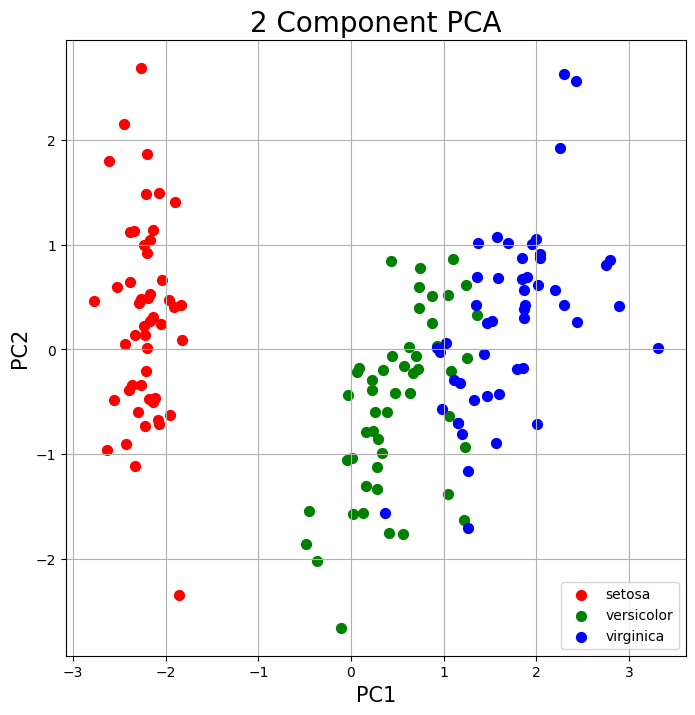

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data from CSV file
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df = pd.read_csv(url)

print(df)
print("............................")

# Separate features and target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(X)
print("............................")
print(y)
print("............................")

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)
print("............................")

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
print(principal_components)
print("............................")


# Create new DataFrame with principal components and target variable
df_pca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
df_pca['target'] = y

# Plot principal components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
               , df_pca.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


# Data Integration

Supongamos que tenemos dos conjuntos de datos, uno con información sobre clientes y otro con información sobre productos. Queremos combinar estos conjuntos de datos en uno solo para poder analizar la relación entre las compras de los clientes y las ventas de los productos.

En primer lugar, vamos a crear dos conjuntos de datos de muestra:

In [ ]:
import pandas as pd

# create customer dataset
customer_data = {'customer_id': ['C001', 'C002', 'C003', 'C004', 'C005'],
                 'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
                 'age': [25, 35, 28, 42, 31],
                 'compra': ['P005', 'P005', 'P003', 'P004', 'P005']}
customer_df = pd.DataFrame(customer_data)

# create product dataset
product_data = {'product_id': ['P001', 'P002', 'P003', 'P004', 'P005'],
                'product_name': ['Product A', 'Product B', 'Product C', 'Product D', 'Product E'],
                'price': [10.99, 24.99, 8.99, 19.99, 15.99]}
product_df = pd.DataFrame(product_data)


A continuación, podemos utilizar la función merge() para combinar los dos conjuntos de datos basándonos en una columna común, en este caso, las columnas customer_id y product_id:

In [ ]:
# merge datasets on customer_id and product_id columns
merged_df = pd.merge(customer_df, product_df, left_on='compra', right_on='product_id')

# drop duplicate column
merged_df = merged_df.drop(columns=['product_id'])

# display merged dataset
print(merged_df.head())


  customer_id     name  age compra product_name  price
0        C001    Alice   25   P005    Product E  15.99
1        C002      Bob   35   P005    Product E  15.99
2        C003  Charlie   28   P003    Product C   8.99
3        C004    David   42   P004    Product D  19.99
4        C005      Eve   31   P005    Product E  15.99


En este ejemplo, hemos utilizado la función merge() para combinar los conjuntos de datos customer_df y product_df basándonos en las columnas compra y product_id. A continuación, eliminamos el duplicado de la columna product_id resultante de la fusión, lo que da como resultado un único conjunto de datos fusionado que contiene información de clientes y productos.

# Cross-validation

En este ejemplo, utilizamos el popular conjunto de datos Iris, que contiene mediciones de la longitud y anchura de los sépalos y pétalos de tres tipos diferentes de flores de iris. Utilizamos un clasificador de árbol de decisión y realizamos una validación cruzada de 10 veces.

La función cross_val_score divide el conjunto de datos en 10 partes, entrena el clasificador de árbol de decisión en 9 partes y, a continuación, lo prueba en la parte restante. Repite este proceso para todas las combinaciones posibles de divisiones de entrenamiento/prueba y devuelve la precisión de cada pliegue.

A continuación, imprimimos la precisión de cada pliegue y la precisión media de todos los pliegues. Esto nos da una idea del rendimiento de nuestro modelo y de si se está ajustando demasiado o demasiado poco a los datos.

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

# Separate features and target variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Initialize a decision tree classifier
classifier = DecisionTreeClassifier()

# Perform 10-fold cross-validation
scores = cross_val_score(classifier, X, y, cv=10)

# Print the accuracy of each fold and the mean accuracy
for i, score in enumerate(scores):
    print("Accuracy of fold %d: %.2f" % (i+1, score))
print("Mean Accuracy: %.2f%%" % (scores.mean()*100))


Accuracy of fold 1: 1.00
Accuracy of fold 2: 0.93
Accuracy of fold 3: 1.00
Accuracy of fold 4: 0.93
Accuracy of fold 5: 0.93
Accuracy of fold 6: 0.87
Accuracy of fold 7: 0.93
Accuracy of fold 8: 1.00
Accuracy of fold 9: 1.00
Accuracy of fold 10: 1.00
Mean Accuracy: 96.00%


# Hypothesis testing

En el ejemplo proporcionado, p_val se refiere al valor p obtenido de la prueba t y t_stat se refiere al estadístico t obtenido de la prueba t.

El valor p es un valor de probabilidad que mide la evidencia contra la hipótesis nula. Representa la probabilidad de observar los datos de la muestra o resultados más extremos, suponiendo que la hipótesis nula sea cierta. Si el valor p es inferior a un nivel de significación predeterminado, normalmente 0,05, rechazamos la hipótesis nula a favor de la hipótesis alternativa.

Por otra parte, el estadístico t es una medida de la diferencia entre las medias de dos grupos en términos de error estándar. Se calcula dividiendo la diferencia entre las medias muestrales por el error estándar de la diferencia. Si el valor absoluto del estadístico t es superior a un valor crítico, rechazamos la hipótesis nula.

In [ ]:
import numpy as np
from scipy import stats

# generate two random samples with a mean difference
sample1 = np.random.normal(5, 2, 100)
sample2 = np.random.normal(7, 2, 100)

# perform a two-sample t-test with equal variances assumed
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=True)

# print the results
print("t-statistic: {:.4f}".format(t_stat))
print("p-value: {:.4f}".format(p_val))

# perform a two-sample t-test with equal variances not assumed
t_stat, p_val = stats.ttest_ind(sample1, sample2, equal_var=False)

# print the results
print("t-statistic: {:.4f}".format(t_stat))
print("p-value: {:.4f}".format(p_val))


t-statistic: -8.1703
p-value: 0.0000
t-statistic: -8.1703
p-value: 0.0000


# Outlier detection

En este ejemplo, primero generamos un conjunto de datos con una mezcla de inliers y outliers. A continuación, ajustamos el modelo LOF a estos datos, que asigna una puntuación a cada punto de datos en función de su densidad local en comparación con sus vecinos. Los puntos con puntuaciones bajas tienen más probabilidades de ser valores atípicos.

Utilizamos el método fit_predict para detectar los valores atípicos en los datos y, a continuación, trazamos los puntos de datos con los valores atípicos marcados en rojo. El gráfico resultante muestra los valores atípicos como puntos que están lejos de los grupos densos de valores atípicos.

La detección de valores atípicos es una técnica importante en el análisis de datos y puede utilizarse para identificar puntos de datos que no son coherentes con la mayoría de los datos, lo que puede indicar errores o anomalías en los datos. El algoritmo LOF es un método popular para la detección de valores atípicos y puede utilizarse en diversas aplicaciones.

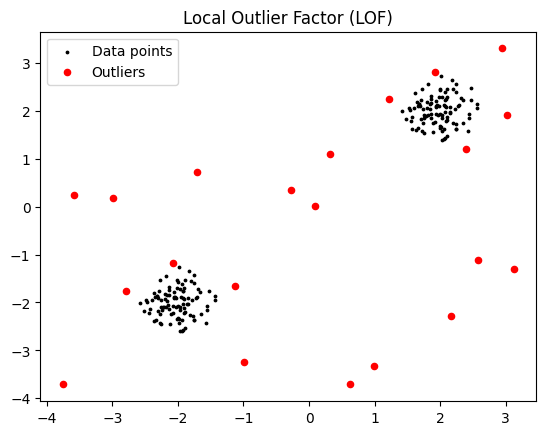

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate random data
np.random.seed(42)
X = 0.3 * np.random.randn(100, 2)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X + 2, X - 2, X_outliers]

# Fit the LOF model to the data
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(X)

# Plot the data points and mark the outliers
plt.title("Local Outlier Factor (LOF)")
plt.scatter(X[:, 0], X[:, 1], color='k', s=3.0, label='Data points')
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], color='r', s=20.0, label='Outliers')
plt.legend()
plt.show()
